# Análisis de datos y relaciones entre variables.

## Importación de librerías y datos

Por medio de nuestra libería ESIOS_contoller.py importamos nuestro último dataset de datos y lo parseamos para su uso. Sirve tanto como para Drive como jupiter.

In [1]:
import json, urllib, datetime, pickle, time
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
from keras.optimizers import *
from scipy.stats import *
from importlib.machinery import SourceFileLoader


try:
  from google.colab import drive
  drive.mount('/content/drive')
  path = '/content/drive/My Drive/TFM/Utils/ESIOS_contoller.py'
  in_colab = True
except:
  path = '../utils/ESIOS_contoller.py'
  in_colab = False
  

esios_assembler = SourceFileLoader('esios', path).load_module()

esios_controller = esios_assembler.ESIOS(in_colab)
data_consumo = esios_controller.get_data()

Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mostrando los datos de data_total.csv
(30555, 29)
________________________________________________________________________________


## Estudio de la variable precio global
Vamos a ver las relaciones y los los metadatos asociados de la variable del precio.

In [2]:
x = data_consumo['date_timestamp']
data_pvpc = data_consumo['PVPC_DEF']

data_pvpc.describe() 

count    30555.000000
mean       115.043786
std         15.745210
min         60.730000
25%        106.060000
50%        115.720000
75%        125.650000
max        182.540000
Name: PVPC_DEF, dtype: float64

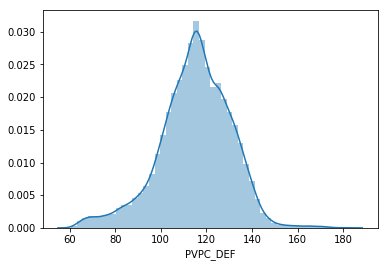

In [3]:
sns.distplot(data_pvpc)

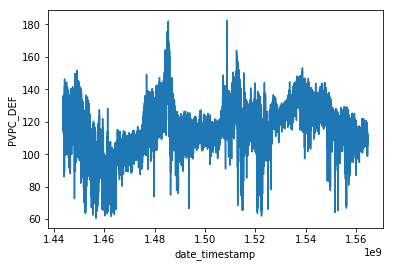

In [4]:
sns.lineplot(x="date_timestamp", y="PVPC_DEF",data=data_consumo)


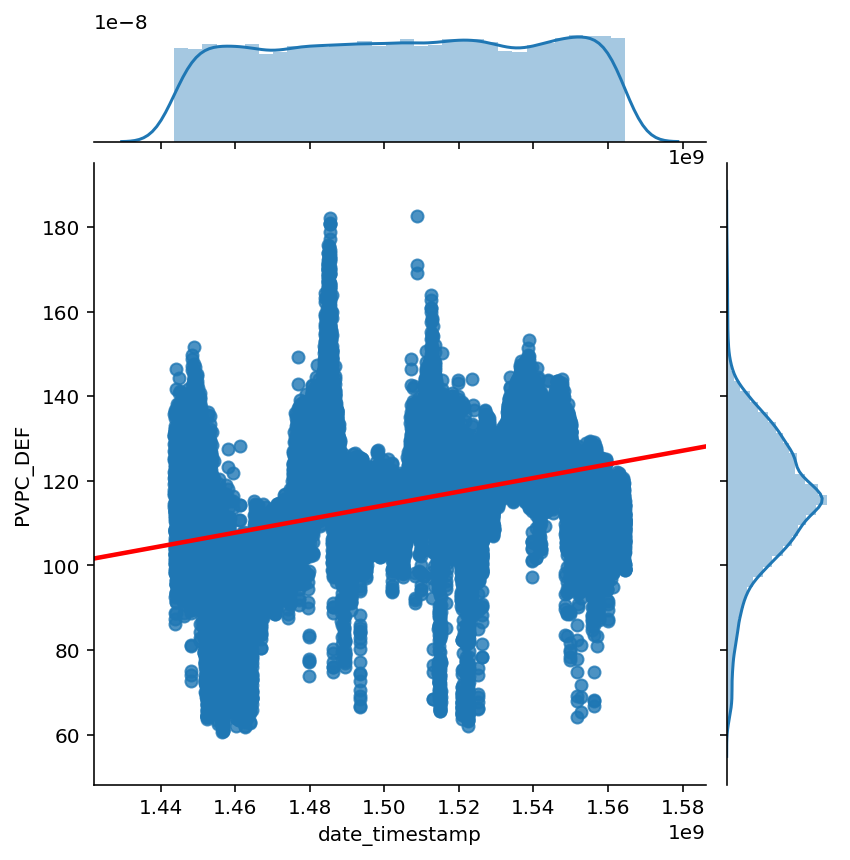

In [0]:
sns.jointplot(x="date_timestamp", y="PVPC_DEF",  kind='reg', data=data_consumo,  joint_kws={'line_kws':{'color':'red'}})

In [0]:
sns.kdeplot(x, y, shade=True)

NameError: ignored

## Estudio de la variable precio a nivel semanal y mensual

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

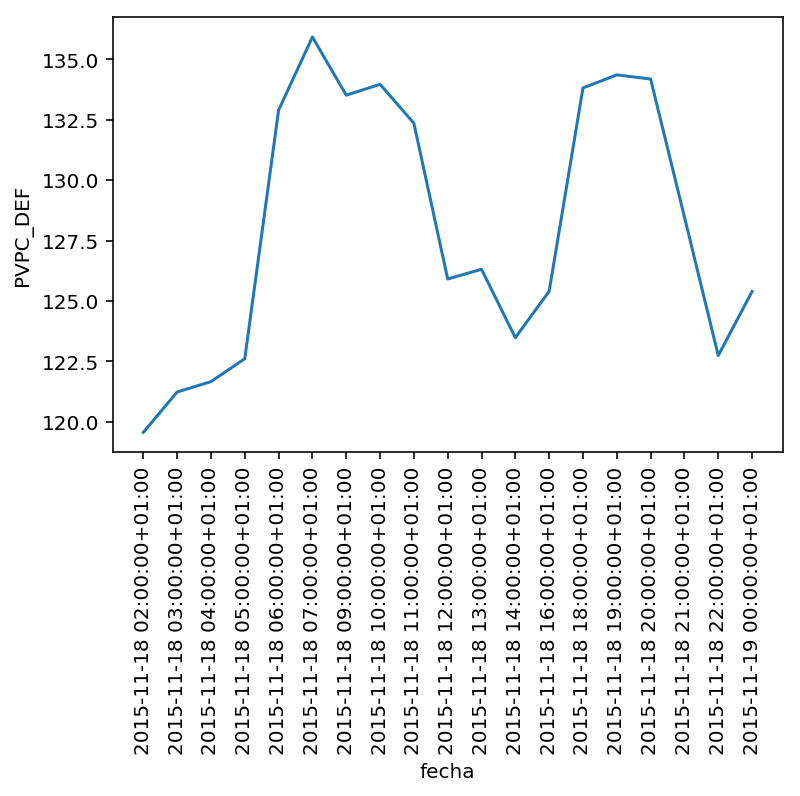

In [0]:
data_tiempo_dia = data_consumo.loc[1004:1022,'fecha']
data_pvpc_dia = data_consumo.loc[1004:1022,'PVPC_DEF']

data_tiempo_semana = data_consumo.loc[1004:1172,'fecha']
data_pvpc_semana = data_consumo.loc[1004:1172,'PVPC_DEF']

df = sns.lineplot(data_tiempo_dia, data_pvpc_dia)
labels = df.get_xticklabels()
plt.setp(labels, rotation=90)

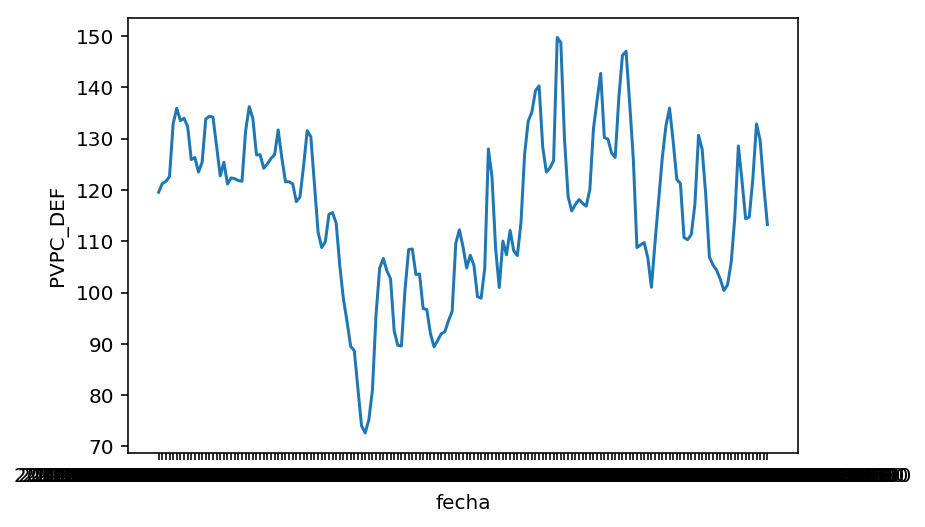

In [0]:
sns.lineplot(data_tiempo_semana, data_pvpc_semana)


## Detección de Outliers
Podemos observar que la variable del precio tiene muchos Outliers, esto hará que la exactitud de nuestro modelo decaiga mucho. Será requerido probar el estudio con la regularización de estos o sin ella. 

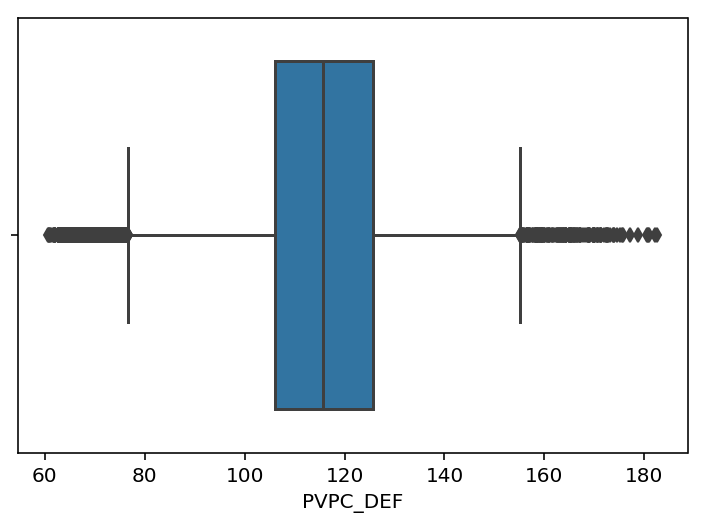

In [0]:
sns.boxplot(data_consumo['PVPC_DEF'])